# Lead case Study Assignment

## Step1:Reading and Understanding the data

In [1]:
#Supressing the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the Numpy and Pandas
import numpy as np
import pandas as pd

In [3]:
#Importing the data 
lead=pd.read_csv("S:/ds/Logistic Regression/Assignment/Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Let's check the dimensions of our dataframe
lead.shape

(9240, 37)

In [5]:
#Let's look at the sttistical aspects of our dataframe
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#Let's see the type of each column
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [7]:
# To check the sum of missing values
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

## Step2:Data Cleaning

In [8]:
# Convert Select to nan
lead=lead.replace('Select',np.nan)

In [9]:
#Adding up the missing values(Column wise)
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
#Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
#Dropping the column which has 70% greater than the nan values i.e. Lead Profile
lead=lead.drop('Lead Profile',1)


In [12]:
lead=lead.drop('How did you hear about X Education',1)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
lead['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

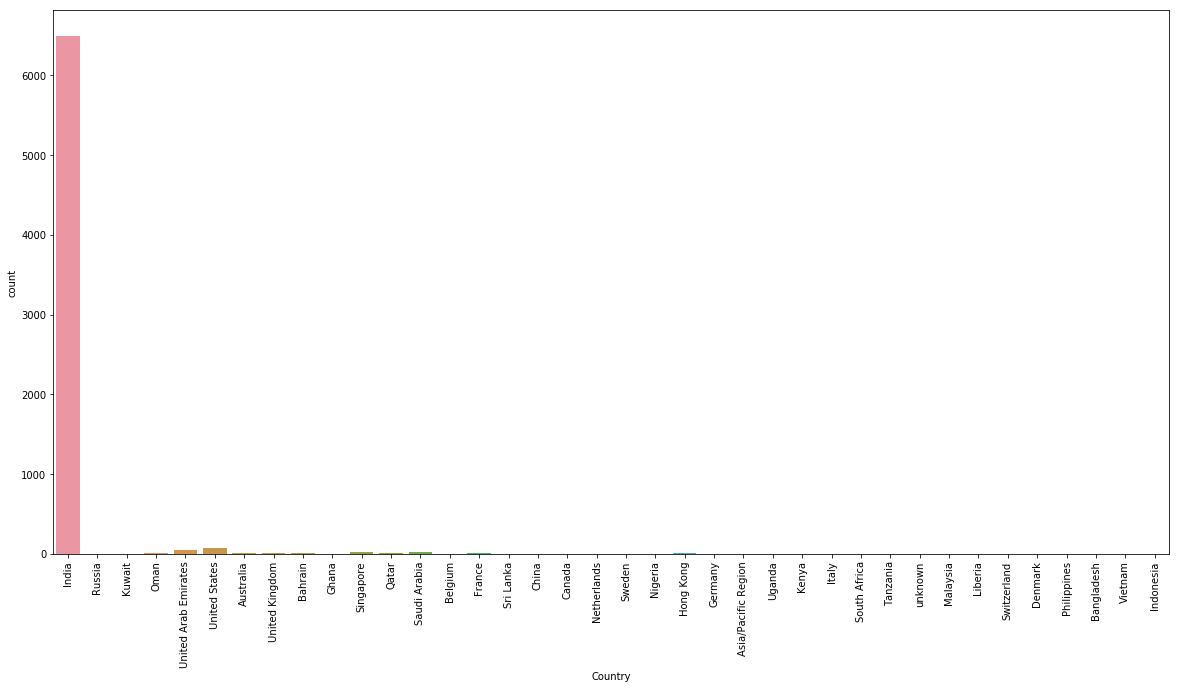

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(lead['Country'])
plt.xticks(rotation=90)

In [16]:
lead['Country']=lead['Country'].replace(np.nan,'India')

In [17]:
lead['Specialization'].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

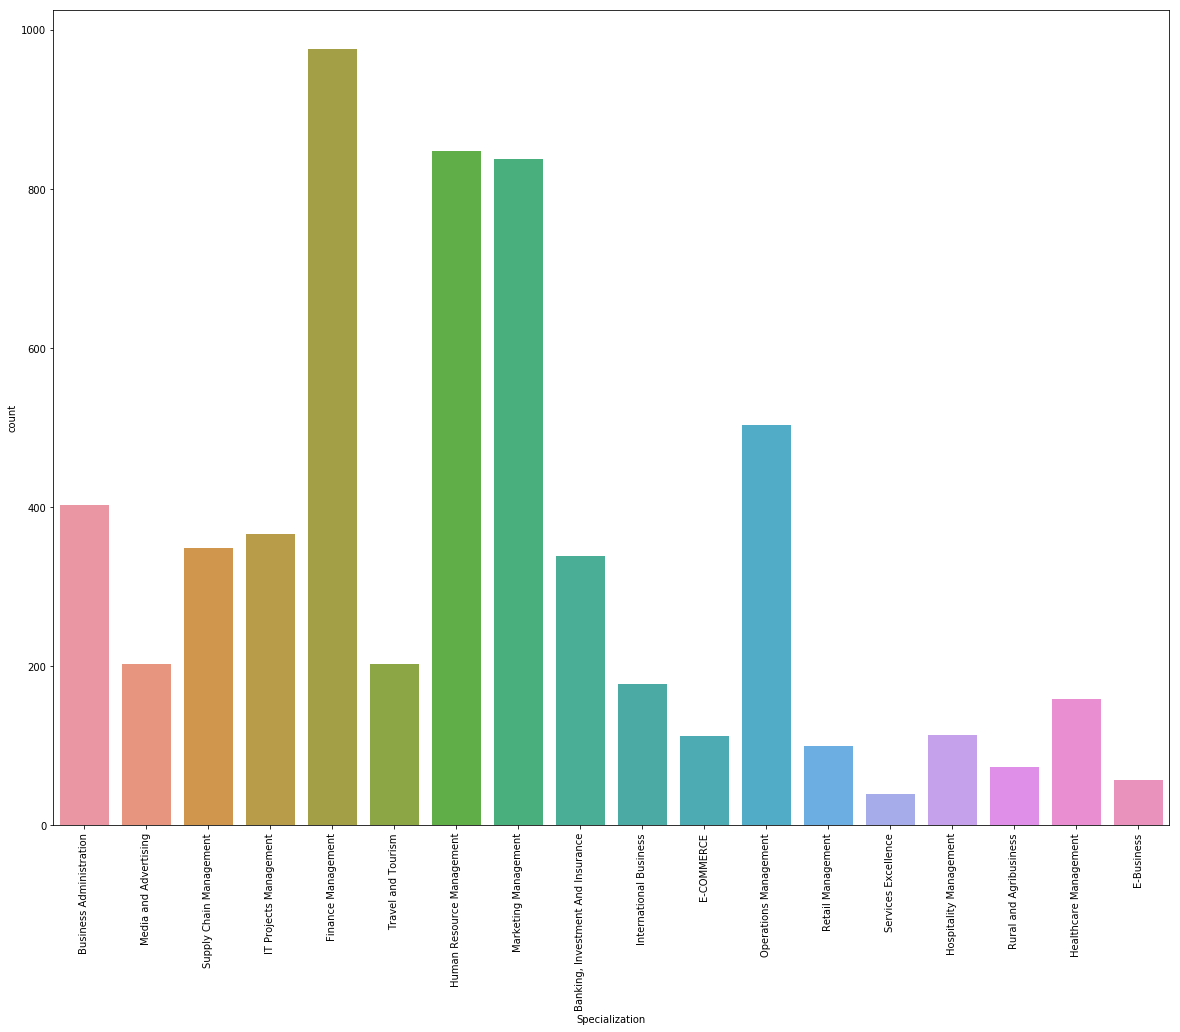

In [18]:
plt.figure(figsize=(20,15))
sns.countplot(lead['Specialization'])
plt.xticks(rotation=90)

In [19]:
lead['Specialization']=lead['Specialization'].replace(np.nan,'Others')

In [20]:
lead['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

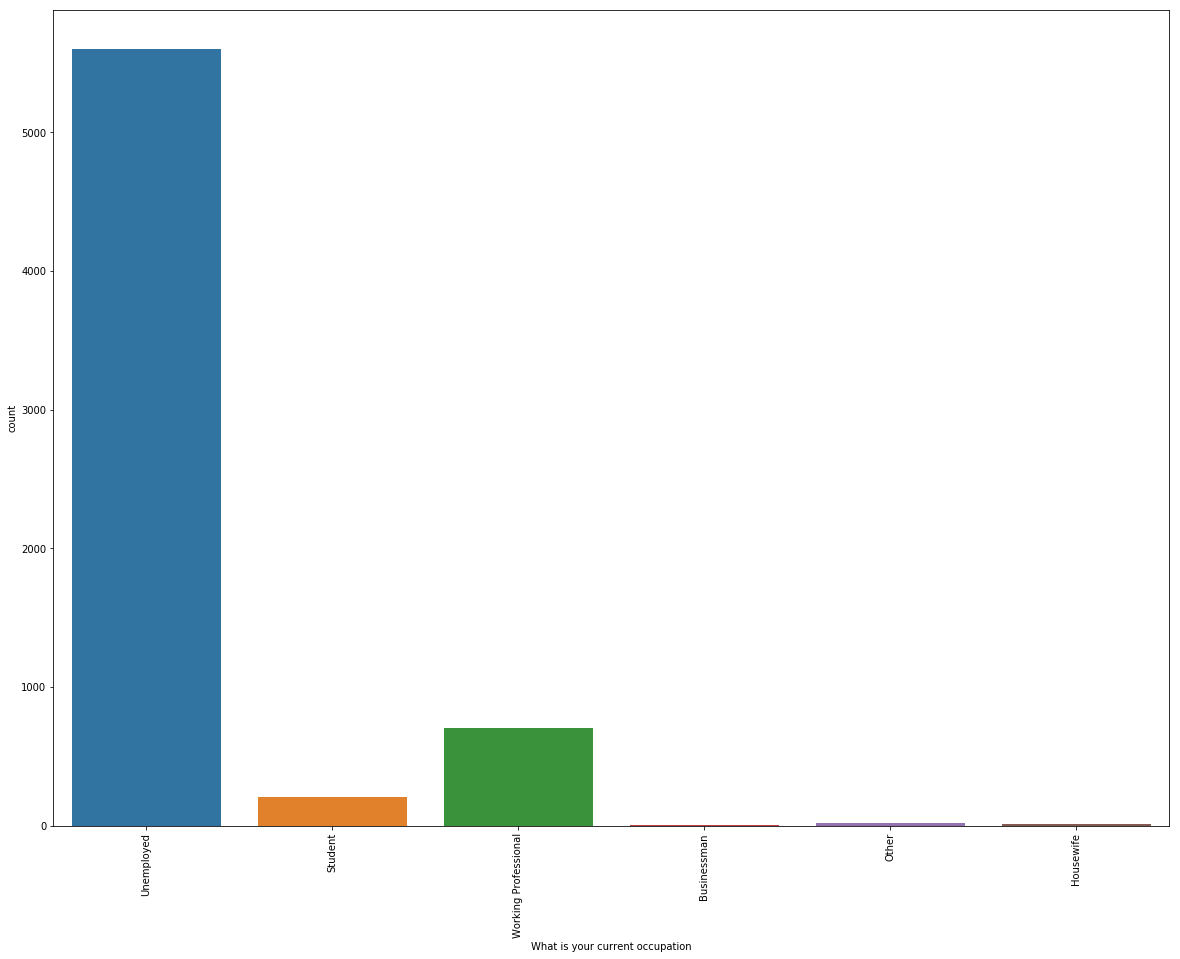

In [21]:
plt.figure(figsize=(20,15))
sns.countplot(lead['What is your current occupation'])
plt.xticks(rotation=90)

In [22]:
lead['What is your current occupation']=lead['What is your current occupation'].replace(np.nan,'Unemployed')

In [23]:
lead['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

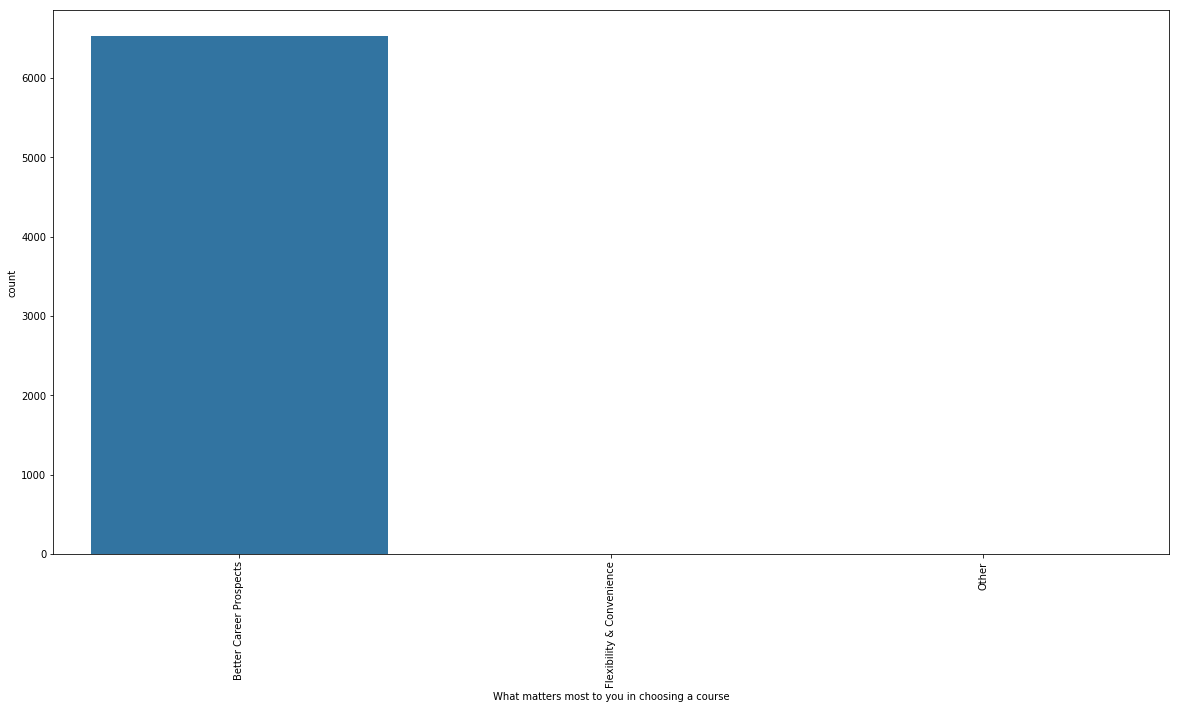

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(lead['What matters most to you in choosing a course'])
plt.xticks(rotation=90)

In [25]:
lead['What matters most to you in choosing a course']=lead['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [26]:
lead['Tags'].describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

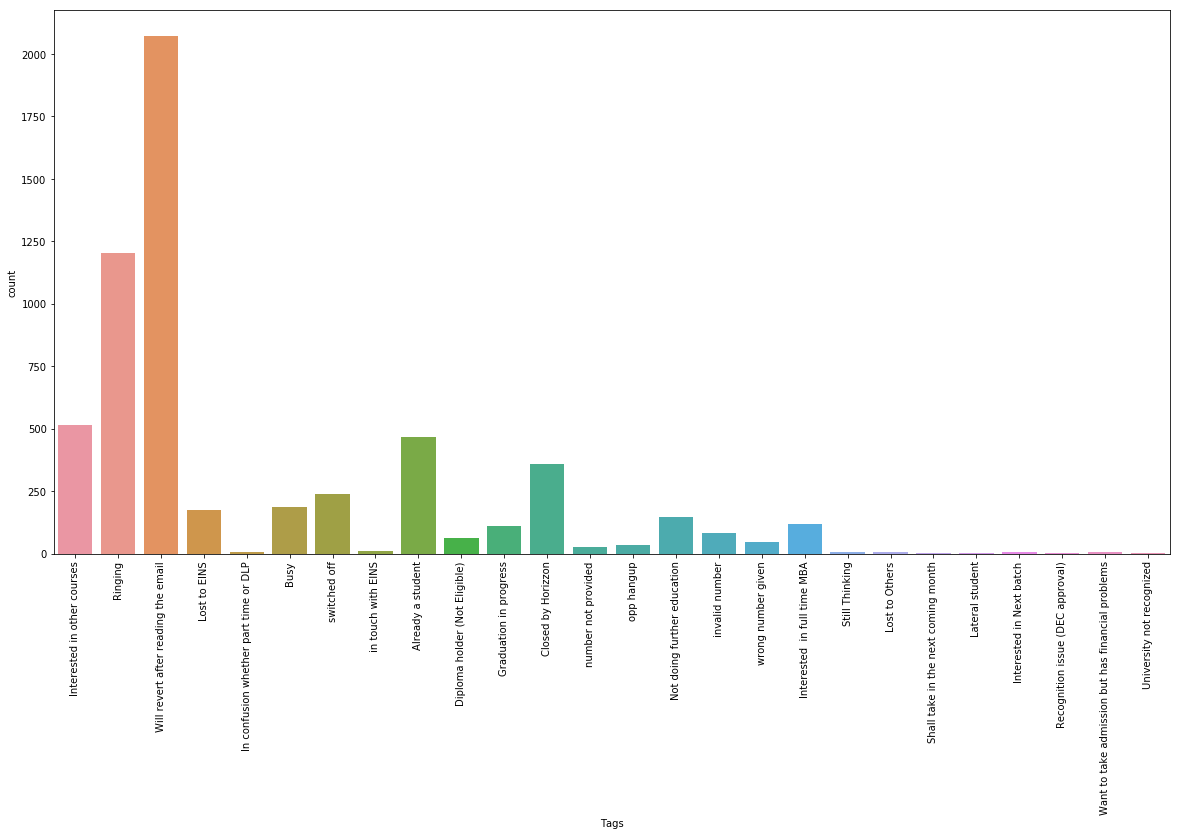

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(lead['Tags'])
plt.xticks(rotation=90)

In [28]:
lead['Tags']=lead['Tags'].replace(np.nan,'Will revert after reading the email')

In [29]:
lead['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

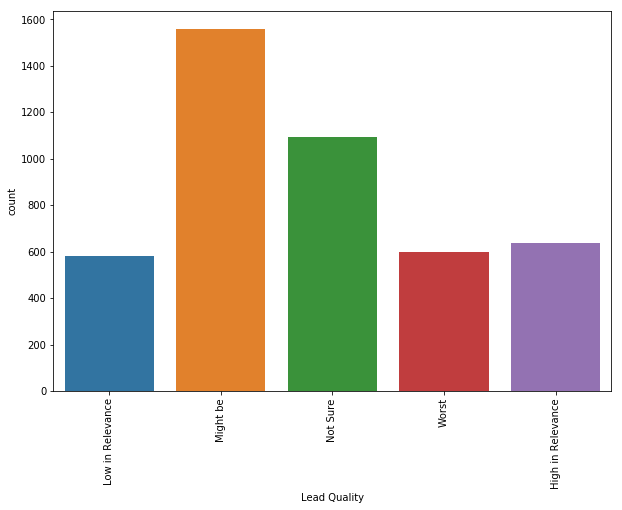

In [30]:
plt.figure(figsize=(10,7))
sns.countplot(lead['Lead Quality'])
plt.xticks(rotation=90)

In [31]:
lead['Lead Quality']=lead['Lead Quality'].replace(np.nan,'Not Sure')

In [32]:
lead['City'].describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

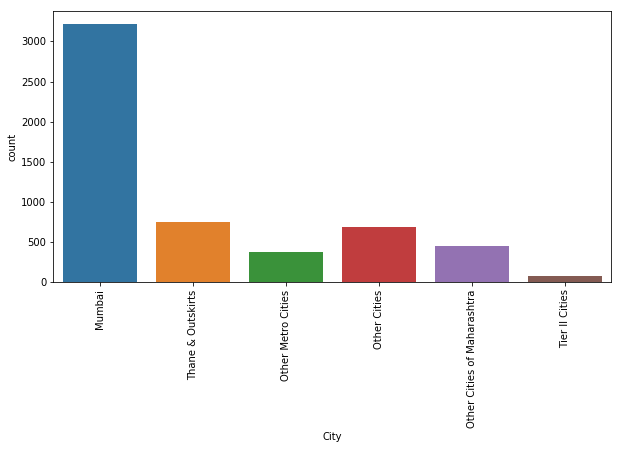

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(lead['City'])
plt.xticks(rotation=90)

In [34]:
lead['City']=lead['City'].replace(np.nan,'Mumbai')

In [35]:
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [36]:
lead['Asymmetrique Activity Index'].describe()

count          5022
unique            3
top       02.Medium
freq           3839
Name: Asymmetrique Activity Index, dtype: object

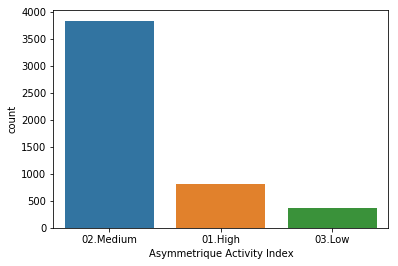

In [37]:
plt1=sns.countplot(lead['Asymmetrique Activity Index'])


In [38]:
lead['Asymmetrique Profile Index'].describe()

count          5022
unique            3
top       02.Medium
freq           2788
Name: Asymmetrique Profile Index, dtype: object

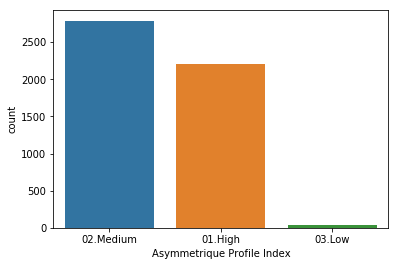

In [39]:
plt2=sns.countplot(lead['Asymmetrique Profile Index'])

In [40]:
lead['Asymmetrique Activity Score'].describe()

count    5022.000000
mean       14.306252
std         1.386694
min         7.000000
25%        14.000000
50%        14.000000
75%        15.000000
max        18.000000
Name: Asymmetrique Activity Score, dtype: float64

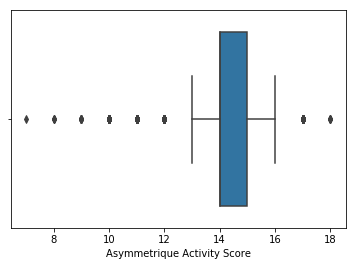

In [41]:
sns.boxplot(lead['Asymmetrique Activity Score'])

In [42]:
lead['Asymmetrique Profile Score'].describe()

count    5022.000000
mean       16.344883
std         1.811395
min        11.000000
25%        15.000000
50%        16.000000
75%        18.000000
max        20.000000
Name: Asymmetrique Profile Score, dtype: float64

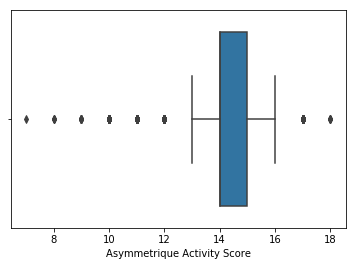

In [43]:
sns.boxplot(lead['Asymmetrique Activity Score'])

In [44]:
lead=lead.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],1)

In [45]:
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [46]:
lead.dropna(inplace=True)

In [47]:
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [48]:
lead.shape

(9074, 31)

## Step3:Analyzing the Data

In [49]:
Converted=(sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

37.85541106458012

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

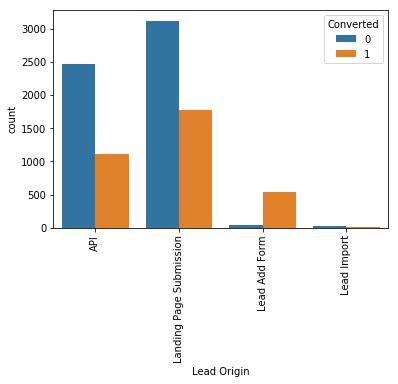

In [50]:
sns.countplot(x='Lead Origin',hue='Converted',data=lead)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

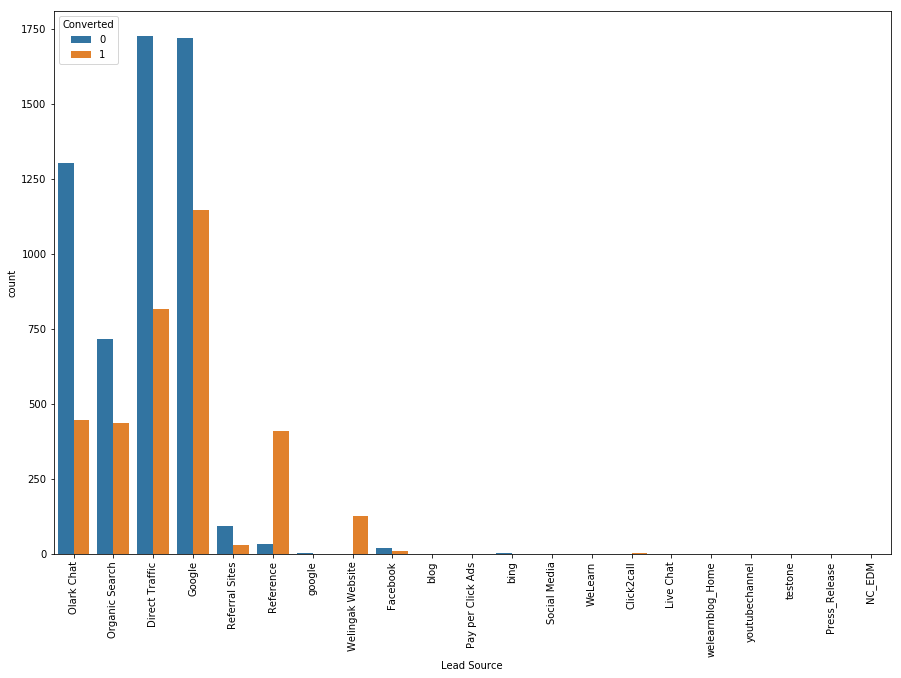

In [51]:
plt.figure(figsize=(15,10))
sns.countplot(x='Lead Source',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [52]:
lead['Lead Source']=lead['Lead Source'].replace(['google'],'Google')
lead['Lead Source']=lead['Lead Source'].replace(['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2cal','Live Chat','welearnblog_Home','youtubechannel','testone','Press_Release','NC_EDM'],'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

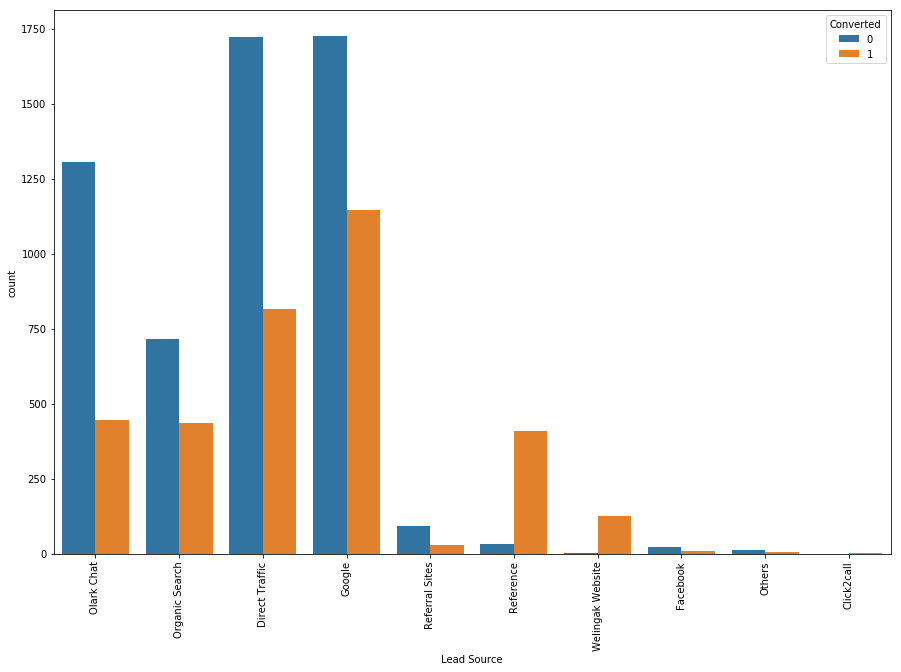

In [53]:
plt.figure(figsize=(15,10))
sns.countplot(x='Lead Source',hue='Converted',data=lead)
plt.xticks(rotation=90)

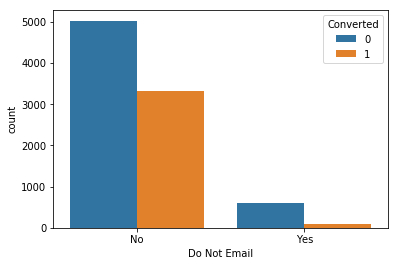

In [54]:
sns.countplot(x='Do Not Email',hue='Converted',data=lead)

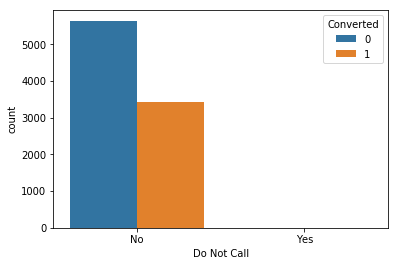

In [55]:
sns.countplot(x='Do Not Call',hue='Converted',data=lead)

In [56]:
lead['TotalVisits'].describe(percentiles=(.05,.10,.25,.50,.75,.90,.95,.99))

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
10%         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

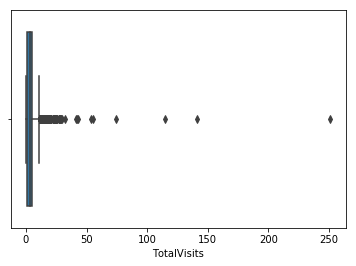

In [57]:
sns.boxplot(lead['TotalVisits'])

In [58]:
percentiles=lead['TotalVisits'].quantile([0.05,0.95]).values
lead['TotalVisits'][lead['TotalVisits']<=percentiles[0]]=percentiles[0]
lead['TotalVisits'][lead['TotalVisits']>=percentiles[1]]=percentiles[1]

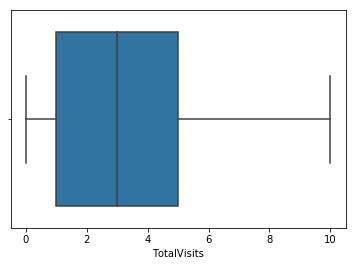

In [59]:
sns.boxplot(lead['TotalVisits'])

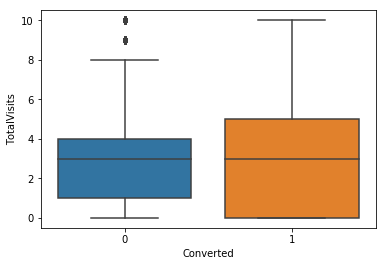

In [60]:
sns.boxplot(y='TotalVisits',x='Converted',data=lead)

In [61]:
lead['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

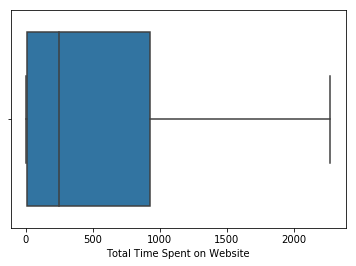

In [62]:
sns.boxplot(lead['Total Time Spent on Website'])

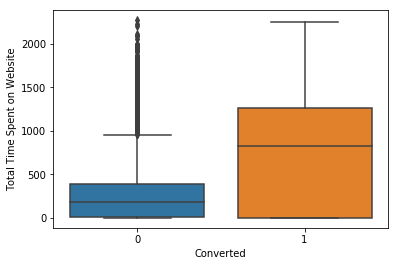

In [63]:
sns.boxplot(y='Total Time Spent on Website',x='Converted',data=lead)

In [64]:
lead['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

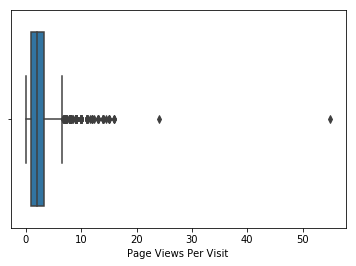

In [65]:
sns.boxplot(lead['Page Views Per Visit'])

In [66]:
percentiles=lead['Page Views Per Visit'].quantile([0.05,0.95]).values
lead['Page Views Per Visit'][lead['Page Views Per Visit']<=percentiles[0]]=percentiles[0]
lead['Page Views Per Visit'][lead['Page Views Per Visit']>=percentiles[1]]=percentiles[1]

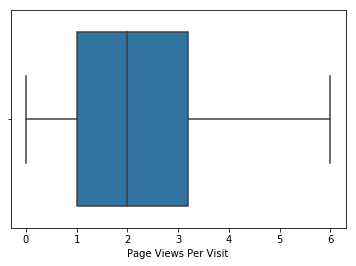

In [67]:
sns.boxplot(lead['Page Views Per Visit'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

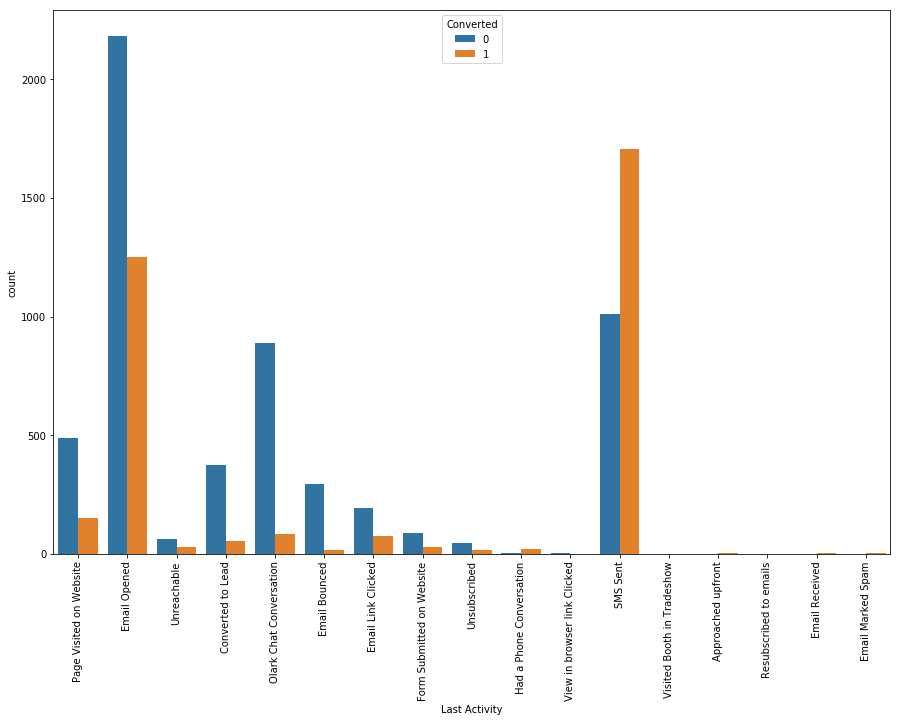

In [68]:
plt.figure(figsize=(15,10))
sns.countplot(x='Last Activity',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [69]:
lead['Last Activity']=lead['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked','Visited Booth in Tradeshow','Approached upfront','Resubscribed to emails','Email Received','Email Marked Spam'],'Other Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

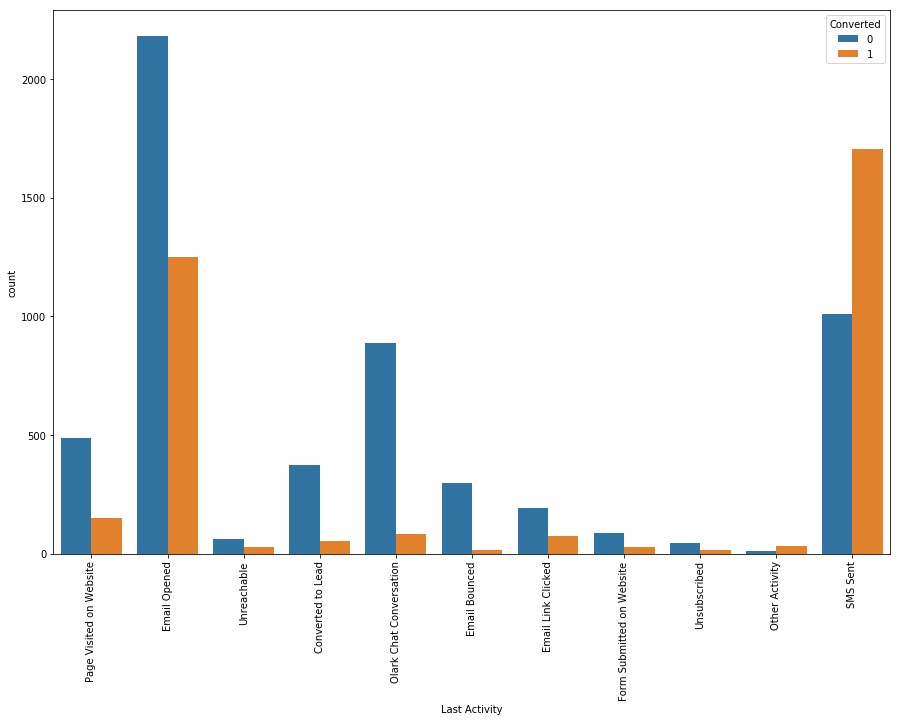

In [70]:
plt.figure(figsize=(15,10))
sns.countplot(x='Last Activity',hue='Converted',data=lead)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

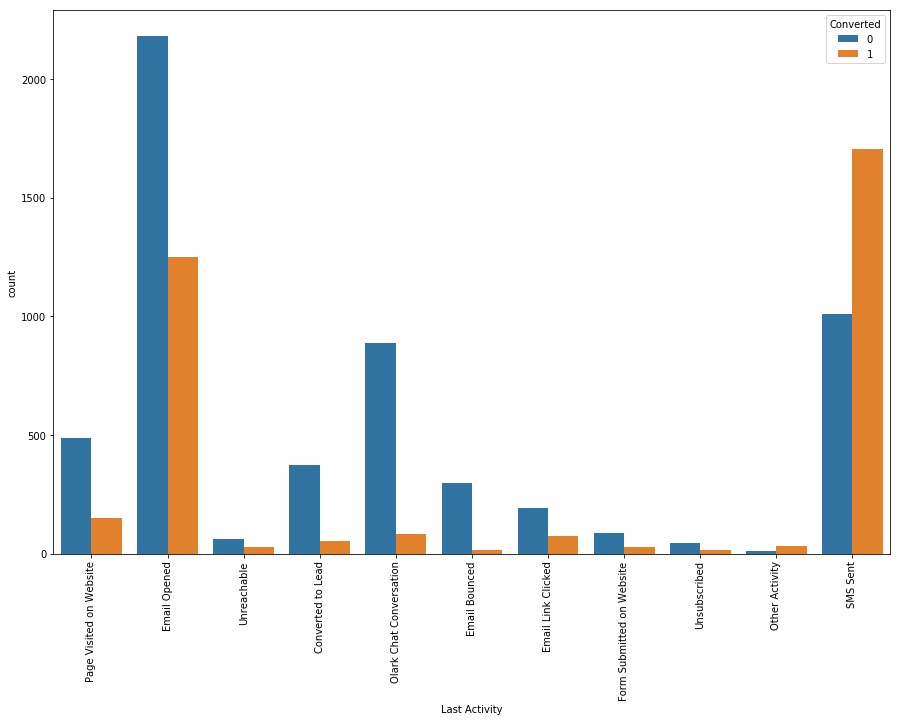

In [71]:
plt.figure(figsize=(15,10))
sns.countplot(x='Last Activity',hue='Converted',data=lead)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

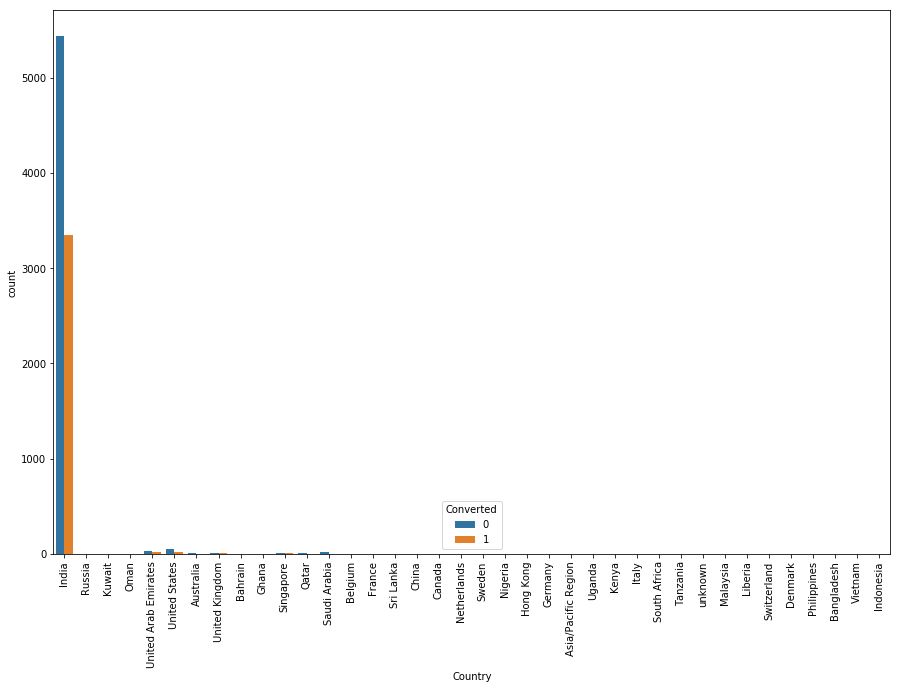

In [72]:
plt.figure(figsize=(15,10))
sns.countplot(x='Country',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [73]:
lead['Country']=lead['Country'].replace(['Russia','Kuwait','Oman','Bahrain','Ghana','Belgium','France','Sri Lanka','China','Canada','Netherlands','Sweden','Nigeria','Hong Kong','Germany','Asia/Pacific Region','Uganda','Kenya','Italy','South Africa','Tanzania','unknown','Malaysia','Liberia','Switzerland','Denmark','Philippines','Bangladesh','Vietnam','Indonesia'],'Other countries')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

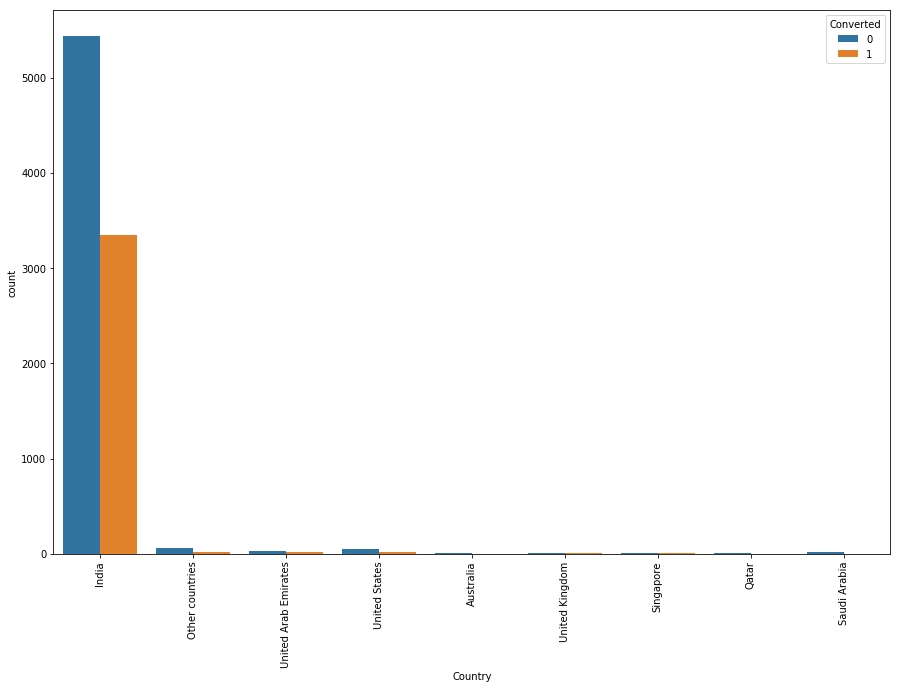

In [74]:
plt.figure(figsize=(15,10))
sns.countplot(x='Country',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [75]:
lead['Specialization'].describe()

count       9074
unique        19
top       Others
freq        3282
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

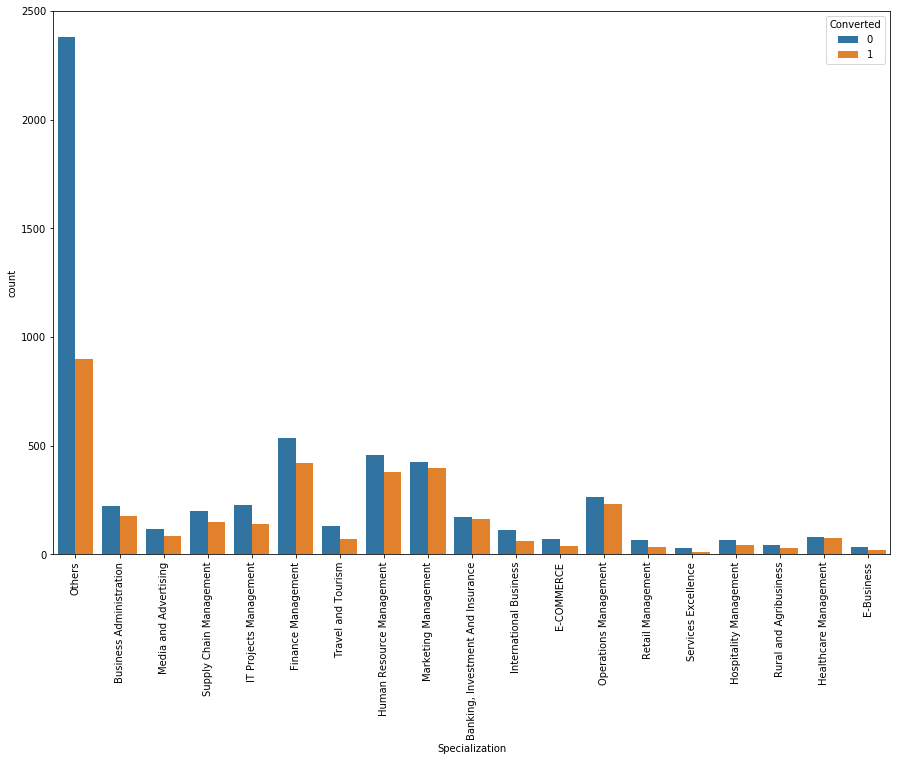

In [76]:
plt.figure(figsize=(15,10))
sns.countplot(x='Specialization',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [77]:
lead['Specialization']=lead['Specialization'].replace('Others','Other Specialization')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

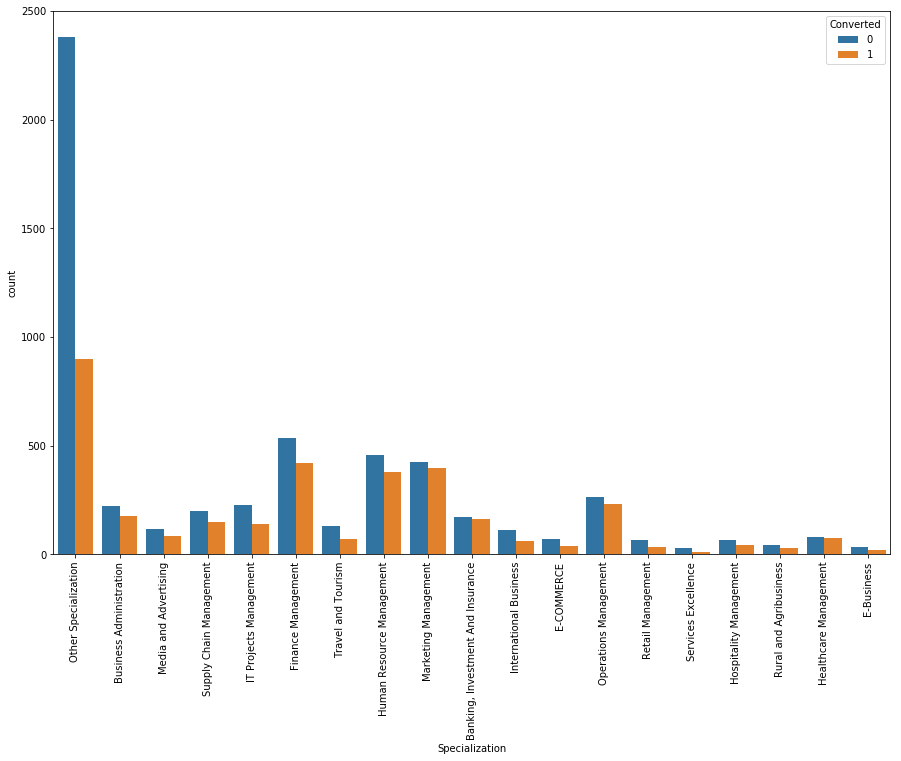

In [78]:
plt.figure(figsize=(15,10))
sns.countplot(x='Specialization',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [79]:
lead['What is your current occupation'].describe()

count           9074
unique             6
top       Unemployed
freq            8159
Name: What is your current occupation, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

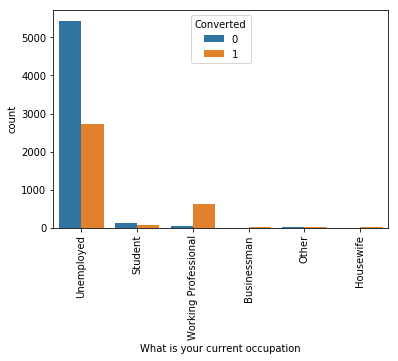

In [80]:
sns.countplot(x='What is your current occupation',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [81]:
lead['What is your current occupation']=lead['What is your current occupation'].replace('Other','Other Occupation')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

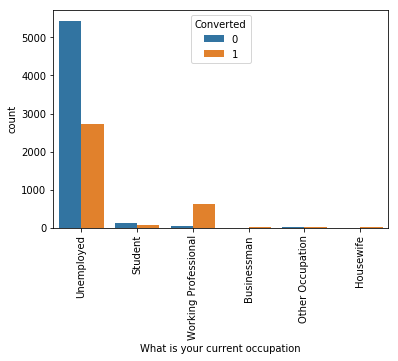

In [82]:
sns.countplot(x='What is your current occupation',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [83]:
lead['What matters most to you in choosing a course'].describe()

count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

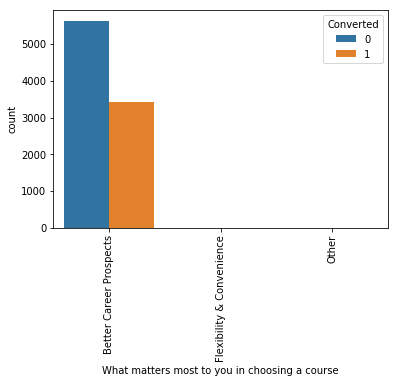

In [84]:
sns.countplot(x='What matters most to you in choosing a course',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [85]:
lead['Search'].describe()

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object

(array([0, 1]), <a list of 2 Text xticklabel objects>)

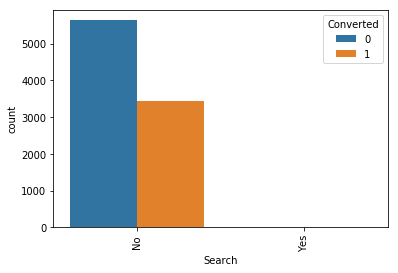

In [86]:
sns.countplot(x='Search',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [87]:
lead['Magazine'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Magazine, dtype: object

In [88]:
lead['Newspaper Article'].describe()

count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object

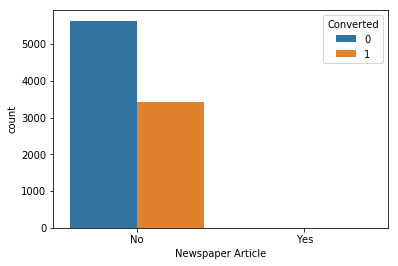

In [89]:
sns.countplot(x='Newspaper Article',hue='Converted',data=lead)

In [90]:
lead['X Education Forums'].describe()

count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object

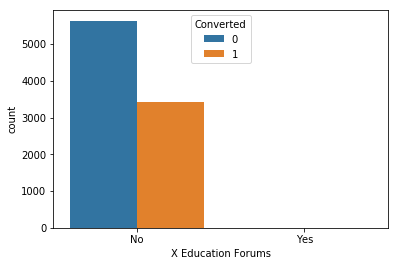

In [91]:
sns.countplot(x='X Education Forums',hue='Converted',data=lead)

In [92]:
lead['Newspaper'].describe()

count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object

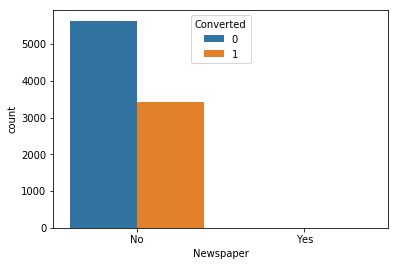

In [93]:
sns.countplot(x='Newspaper',hue='Converted',data=lead)

In [94]:
lead['Digital Advertisement'].describe()

count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object

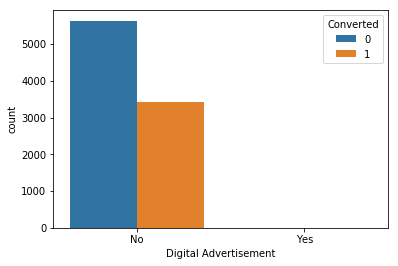

In [95]:
sns.countplot(x='Digital Advertisement',hue='Converted',data=lead)

In [96]:
lead['Through Recommendations'].describe()

count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object

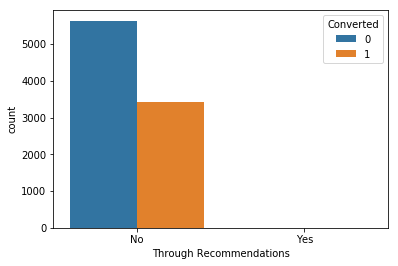

In [97]:
sns.countplot(x='Through Recommendations',hue='Converted',data=lead)

In [98]:
lead['Receive More Updates About Our Courses'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Receive More Updates About Our Courses, dtype: object

In [99]:
lead['Tags'].describe()

count                                    9074
unique                                     26
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

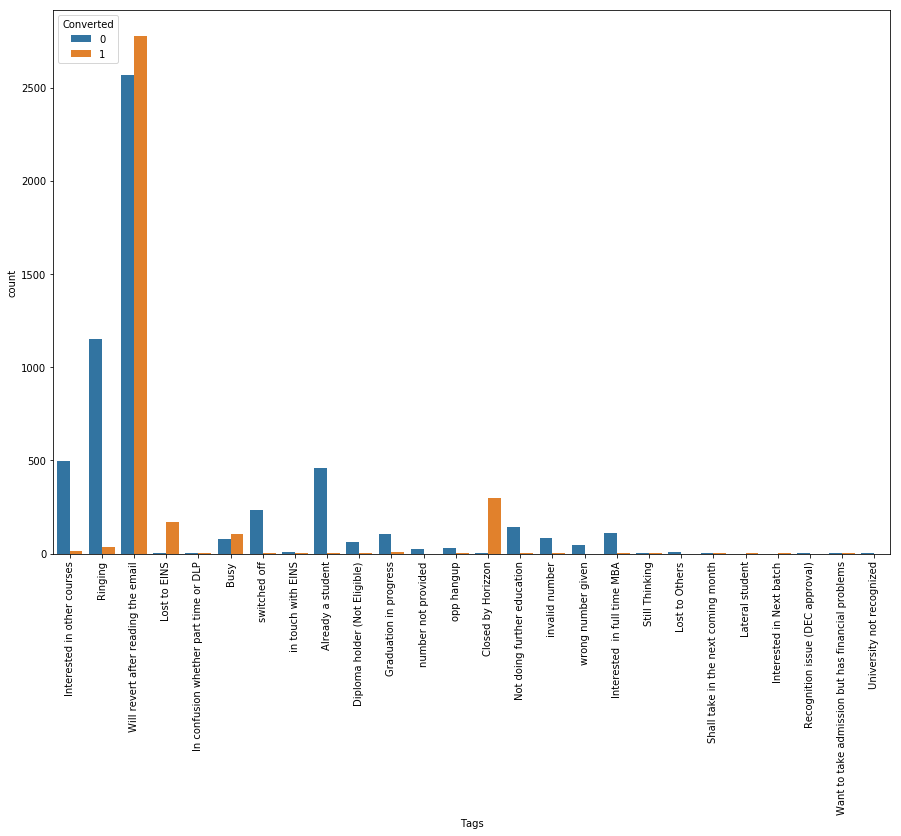

In [100]:
plt.figure(figsize=(15,10))
sns.countplot(x='Tags',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [101]:
lead['Tags']=lead['Tags'].replace(['In confusion whether part time or DLP','in touch with EINS','Diploma holder (Not Eligible)','Graduation in progress','number not provided','opp hangup','Still Thinking','Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch','Recognition issue (DEC approval)','Want to take admission but has financial problems','University not recognized'],'Other Tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

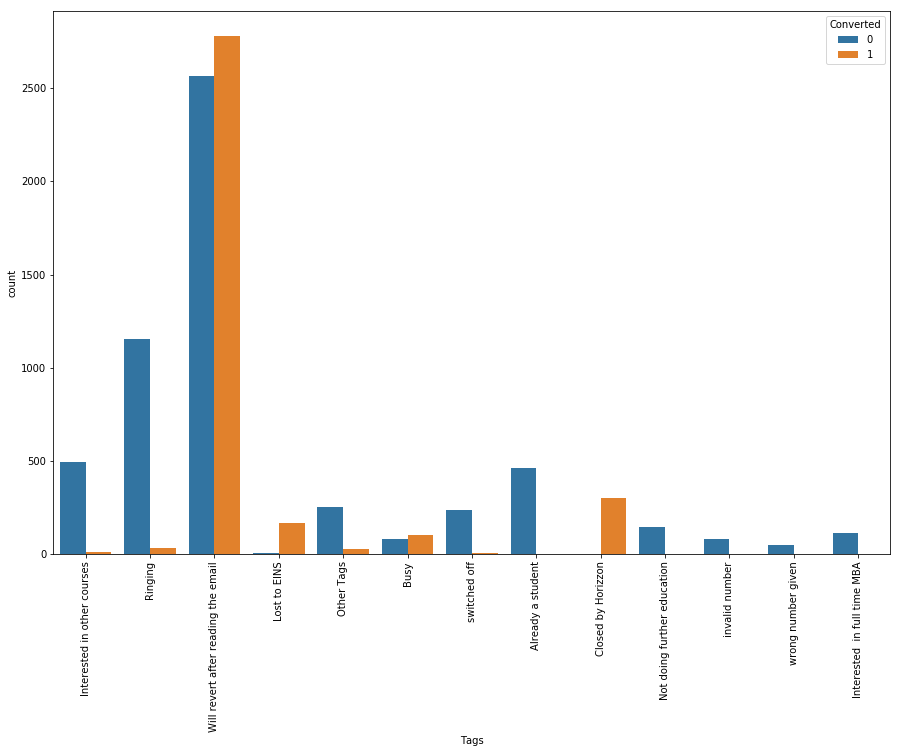

In [102]:
plt.figure(figsize=(15,10))
sns.countplot(x='Tags',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [103]:
lead['Lead Quality'].describe()

count         9074
unique           5
top       Not Sure
freq          5806
Name: Lead Quality, dtype: object

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

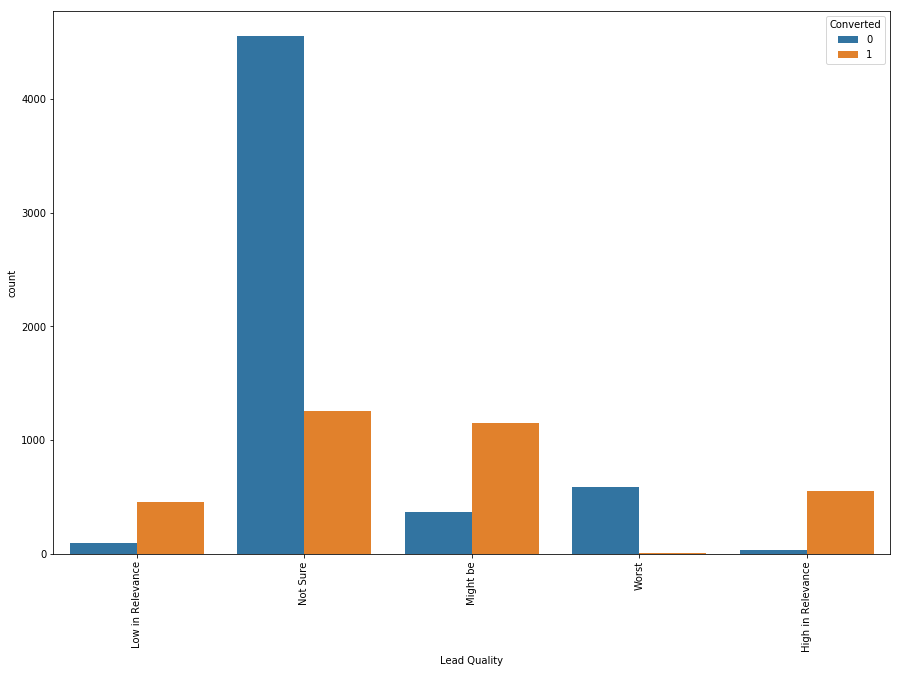

In [104]:
plt.figure(figsize=(15,10))
sns.countplot(x='Lead Quality',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [105]:
lead['Update me on Supply Chain Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Update me on Supply Chain Content, dtype: object

In [106]:
lead['Get updates on DM Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Get updates on DM Content, dtype: object

In [107]:
lead['City'].describe()

count       9074
unique         6
top       Mumbai
freq        6752
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

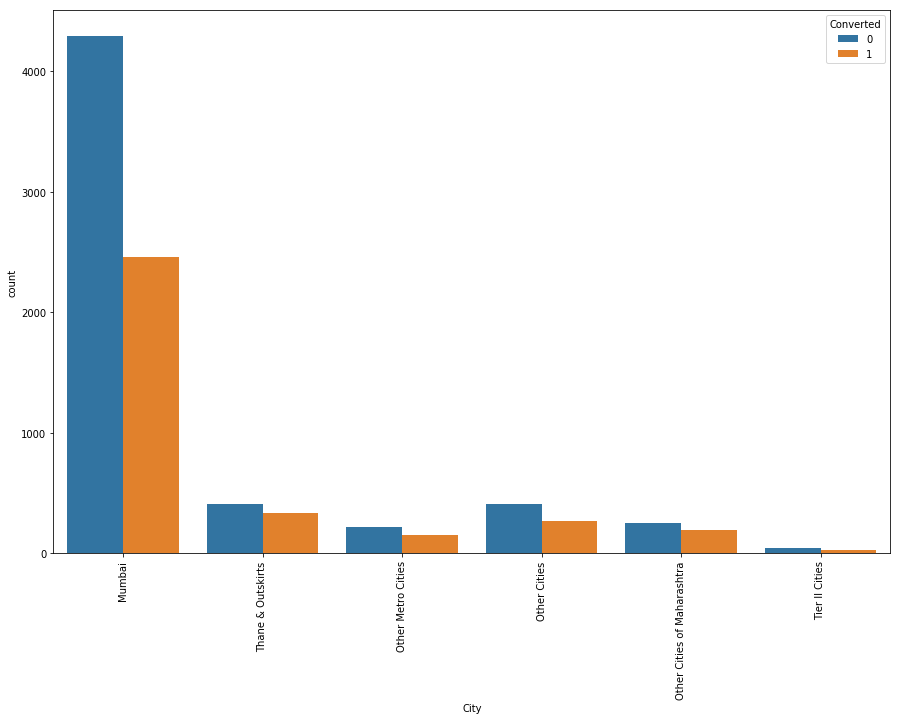

In [108]:
plt.figure(figsize=(15,10))
sns.countplot(x='City',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [109]:
lead['I agree to pay the amount through cheque'].describe()

count     9074
unique       1
top         No
freq      9074
Name: I agree to pay the amount through cheque, dtype: object

In [110]:
lead['A free copy of Mastering The Interview'].describe()

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

(array([0, 1]), <a list of 2 Text xticklabel objects>)

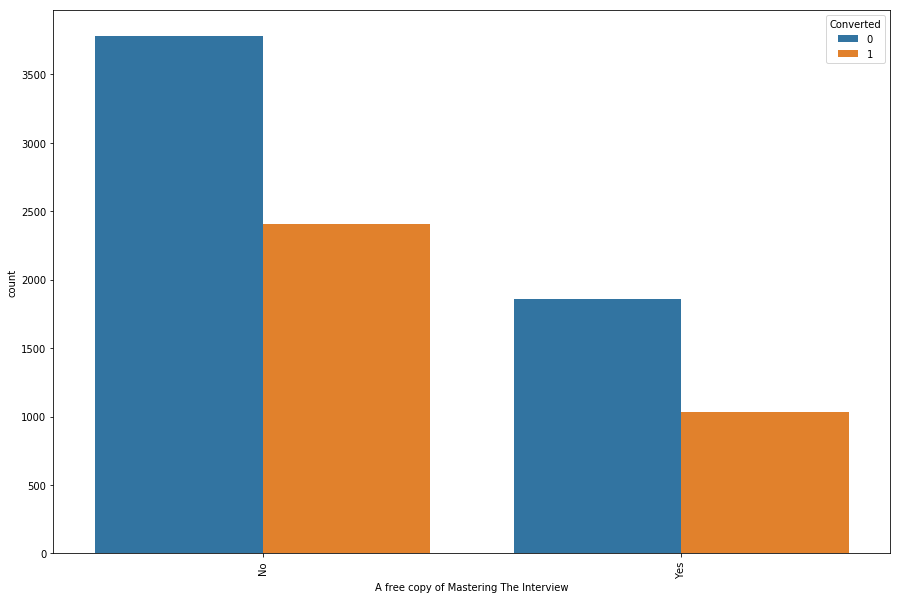

In [111]:
plt.figure(figsize=(15,10))
sns.countplot(x='A free copy of Mastering The Interview',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [112]:
lead['Last Notable Activity'].describe()

count         9074
unique          16
top       Modified
freq          3267
Name: Last Notable Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

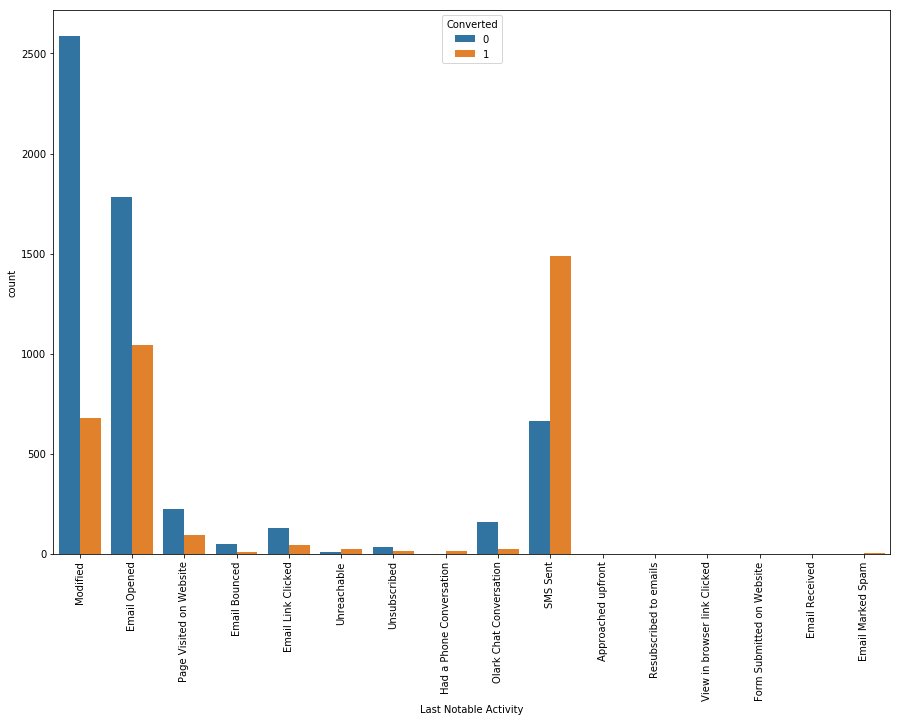

In [113]:
plt.figure(figsize=(15,10))
sns.countplot(x='Last Notable Activity',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [114]:
lead['Last Notable Activity']=lead['Last Notable Activity'].replace(['Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website','Email Received','Email Marked Spam'],'Other Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

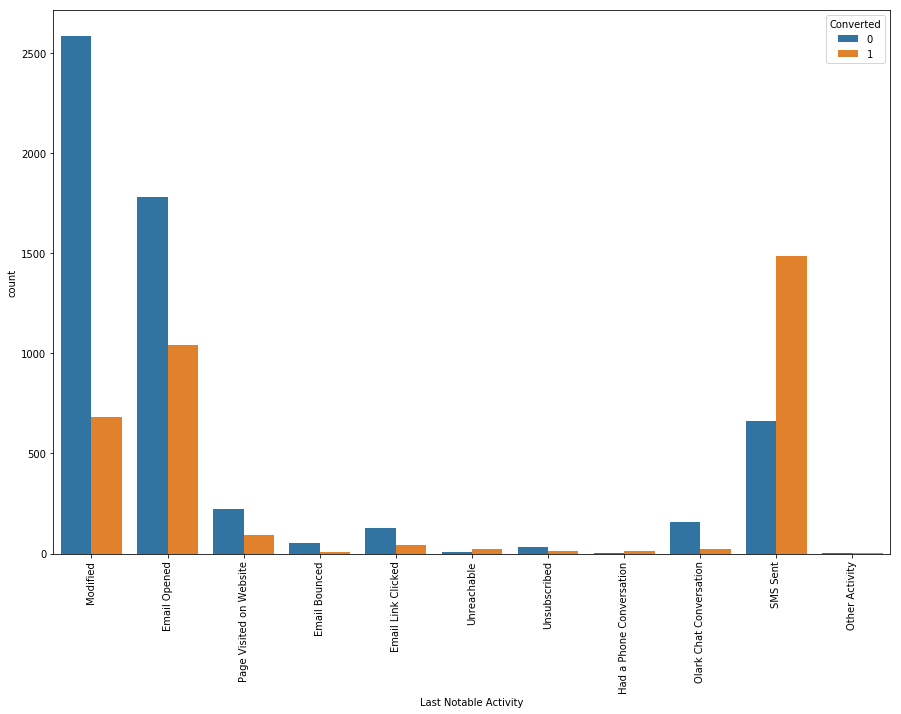

In [115]:
plt.figure(figsize=(15,10))
sns.countplot(x='Last Notable Activity',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [116]:
lead=lead.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Country','I agree to pay the amount through cheque','A free copy of Mastering The Interview'],1)

In [117]:
lead.shape

(9074, 16)

In [118]:
lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


### Data Preparation

In [119]:
# Convert the Binary variables(yes/no) into 0 and 1
varlist=['Do Not Email','Do Not Call']
def binary_map(x):
    return x.map({'Yes':1,'No':0})
lead[varlist]=lead[varlist].apply(binary_map)

In [120]:
lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Other Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [121]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 16 columns):
Prospect ID                        9074 non-null object
Lead Origin                        9074 non-null object
Lead Source                        9074 non-null object
Do Not Email                       9074 non-null int64
Do Not Call                        9074 non-null int64
Converted                          9074 non-null int64
TotalVisits                        9074 non-null float64
Total Time Spent on Website        9074 non-null int64
Page Views Per Visit               9074 non-null float64
Last Activity                      9074 non-null object
Specialization                     9074 non-null object
What is your current occupation    9074 non-null object
Tags                               9074 non-null object
Lead Quality                       9074 non-null object
City                               9074 non-null object
Last Notable Activity              9074 non-null object

In [122]:
#Creating dummy variables for some of the categorical variables
dummy=pd.get_dummies(lead[['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','Lead Quality','Last Notable Activity','City']],drop_first=True)
lead=pd.concat([lead,dummy],axis=1)

In [123]:
lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Other Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,0,0,0,0,0,0,0


In [124]:
lead=lead.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','Lead Quality','Last Notable Activity','City'],1)

In [125]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 83 columns):
Prospect ID                                             9074 non-null object
Do Not Email                                            9074 non-null int64
Do Not Call                                             9074 non-null int64
Converted                                               9074 non-null int64
TotalVisits                                             9074 non-null float64
Total Time Spent on Website                             9074 non-null int64
Page Views Per Visit                                    9074 non-null float64
Lead Origin_Landing Page Submission                     9074 non-null uint8
Lead Origin_Lead Add Form                               9074 non-null uint8
Lead Origin_Lead Import                                 9074 non-null uint8
Lead Source_Direct Traffic                              9074 non-null uint8
Lead Source_Facebook                                

In [126]:
lead.shape

(9074, 83)

In [127]:
lead.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Other Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
lead.isnull().sum()

Prospect ID                                       0
Do Not Email                                      0
Do Not Call                                       0
Converted                                         0
TotalVisits                                       0
Total Time Spent on Website                       0
Page Views Per Visit                              0
Lead Origin_Landing Page Submission               0
Lead Origin_Lead Add Form                         0
Lead Origin_Lead Import                           0
Lead Source_Direct Traffic                        0
Lead Source_Facebook                              0
Lead Source_Google                                0
Lead Source_Olark Chat                            0
Lead Source_Organic Search                        0
Lead Source_Others                                0
Lead Source_Reference                             0
Lead Source_Referral Sites                        0
Lead Source_Welingak Website                      0
Last Activit

## Step4:Split the data into test and train data

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X=lead.drop(['Prospect ID','Converted'],axis=1)

In [131]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Other Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
y=lead['Converted']

In [133]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [134]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

## Step5:Feature Scaling

In [135]:
from sklearn.preprocessing import StandardScaler

In [136]:
scaler=StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Other Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [137]:
Converted=(sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

37.85541106458012

The data has almost 38% of converted rate


## Step6:Model Building

In [138]:
import statsmodels.api as sm

In [140]:
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6269
Model Family:                Binomial   Df Model:                           81
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1250.3
Date:                Sun, 10 May 2020   Deviance:                       2500.5
Time:                        19:42:24   Pearson chi2:                 3.89e+04
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    3.5822      3.090      1.159      0.246      -2.475       9.639
Do Not Email                                            -1.3798      0.326     -4.229      0.000      -2.019      -0.740
Do Not Call                                             23.7111   1.37e+05      0.000      1.000   -2.68e+05    2.68e+05
TotalVisits                                              0.1814      0.087      2.090      0.037       0.011       0.351
Total Time Spent on Website                              1.1463      0.064     17.923      0.000       1.021       1.272
Page Views Per Visit                                    -0.3272      0.099     -3.309      0.001      -0.521      -0.133
Lead Origin_Landing Page Submission                     -0.9782      0.221     -4.426      0.000      -1.411      -0.545
Lead Origin_Lead Add Form                               -0.3545      1.528     -0.232      0.817      -3.350       2.641
Lead Origin_Lead Import                                 29.7283   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Direct Traffic                              -0.5886      2.384     -0.247      0.805      -5.261       4.083
Lead Source_Facebook                                   -29.2165   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                      -0.3859      2.381     -0.162      0.871      -5.053       4.281
Lead Source_Olark Chat                                   0.2759      2.380      0.116      0.908      -4.389       4.941
Lead Source_Organic Search                              -0.3600      2.387     -0.151      0.880      -5.039       4.319
Lead Source_Others                                       0.1822      2.378      0.077      0.939      -4.478       4.842
Lead Source_Reference                                    1.1350      1.864      0.609      0.543      -2.519       4.789
Lead Source_Referral Sites                              -0.6808      2.427     -0.280      0.779      -5.438       4.076
Lead Source_Welingak Website                             4.8221      1.975      2.441      0.015       0.951       8.693
Last Activity_Email Bounced                             -0.5569      0.870     -0.640      0.522      -2.262       1.148
Last Activity_Email Link Clicked                         0.8426      0.644      1.309      0.191      -0.419       2.105
Last Activity_Email Opened                               0.0002      0.385      0.000      1.000      -0.754       0.754
Last Activity_Form Submitted on Website                  0.1085      0.591      0.184      0.854      -1.050       1.268
Last Activity_Olark Chat Conversation                   -0.5465      0.392     -1.395      0.163      -1.315       0.222
Last Activity_Ot

### Feature Scaling using RFE

In [142]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [143]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,15)
rfe=rfe.fit(X_train,y_train)

In [144]:
rfe.support_

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True, False, False,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False])

In [145]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 31),
 ('TotalVisits', False, 44),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 40),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Direct Traffic', False, 38),
 ('Lead Source_Facebook', False, 39),
 ('Lead Source_Google', False, 42),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 43),
 ('Lead Source_Others', False, 58),
 ('Lead Source_Reference', False, 52),
 ('Lead Source_Referral Sites', False, 33),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 50),
 ('Last Activity_Email Link Clicked', False, 35),
 ('Last Activity_Email Opened', False, 57),
 ('Last Activity_Form Submitted on Website', False, 61),
 ('Last Activity_Olark Chat Conversation', False, 13),
 ('Last Activity_Other Activity', False, 8),
 ('Last Activity_Page Visited on Websi

In [146]:
col=X_train.columns[rfe.support_]

In [147]:
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [148]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hos

In [150]:
# Assigning the model with StatsModel
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())

res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1580.6
Date:                Sun, 10 May 2020   Deviance:                       3161.3
Time:                        19:59:54   Pearson chi2:                 3.11e+04
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8547      0.215     -8.636      0.000      -2.276      -1.434
Do Not Email                                            -1.3106      0.213     -6.154      0.000      -1.728      -0.893
Lead Origin_Lead Add Form                                1.0452      0.360      2.900      0.004       0.339       1.752
Lead Source_Welingak Website                             3.4638      0.817      4.238      0.000       1.862       5.066
What is your current occupation_Working Professional     1.2843      0.287      4.476      0.000       0.722       1.847
Tags_Busy                                                3.5477      0.332     10.680      0.000       2.897       4.199
Tags_Closed by Horizzon                                  7.7377      0.762     10.152      0.000       6.244       9.231
Tags_Lost to EINS                                        8.9540      0.753     11.887      0.000       7.478      10.430
Tags_Ringing                                            -1.9696      0.340     -5.800      0.000      -2.635      -1.304
Tags_Will revert after reading the email                 3.7332      0.228     16.340      0.000       3.285       4.181
Tags_invalid number                                    -23.4649   2.21e+04     -0.001      0.999   -4.34e+04    4.33e+04
Tags_switched off                                       -2.5711      0.589     -4.367      0.000      -3.725      -1.417
Tags_wrong number given                                -23.0779   3.17e+04     -0.001      0.999   -6.21e+04     6.2e+04
Lead Quality_Not Sure                                   -3.3496      0.129    -26.033      0.000      -3.602      -3.097
Lead Quality_Worst                                      -3.7672      0.848     -4.445      0.000      -5.428      -2.106
Last Notable Activity_SMS Sent                           2.7931      0.122     22.838      0.000       2.553       3.033
========================================================================================================================
"""

In [151]:
col1=col.drop('Tags_invalid number',1)

In [152]:
col1

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [153]:
X_train_sm=sm.add_constant(X_train[col1])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())

res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1586.7
Date:                Sun, 10 May 2020   Deviance:                       3173.3
Time:                        20:03:11   Pearson chi2:                 3.07e+04
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0195      0.217     -9.308      0.000      -2.445      -1.594
Do Not Email                                            -1.3018      0.212     -6.130      0.000      -1.718      -0.886
Lead Origin_Lead Add Form                                1.0769      0.362      2.974      0.003       0.367       1.787
Lead Source_Welingak Website                             3.4268      0.818      4.190      0.000       1.824       5.030
What is your current occupation_Working Professional     1.3240      0.290      4.567      0.000       0.756       1.892
Tags_Busy                                                3.7300      0.331     11.270      0.000       3.081       4.379
Tags_Closed by Horizzon                                  7.8904      0.763     10.345      0.000       6.396       9.385
Tags_Lost to EINS                                        9.1124      0.754     12.086      0.000       7.635      10.590
Tags_Ringing                                            -1.7713      0.338     -5.244      0.000      -2.433      -1.109
Tags_Will revert after reading the email                 3.8970      0.230     16.954      0.000       3.446       4.348
Tags_switched off                                       -2.3666      0.588     -4.028      0.000      -3.518      -1.215
Tags_wrong number given                                -20.8825   1.17e+04     -0.002      0.999   -2.29e+04    2.28e+04
Lead Quality_Not Sure                                   -3.3417      0.128    -26.020      0.000      -3.593      -3.090
Lead Quality_Worst                                      -3.7822      0.848     -4.462      0.000      -5.444      -2.121
Last Notable Activity_SMS Sent                           2.7503      0.120     22.841      0.000       2.514       2.986
========================================================================================================================
"""

In [155]:
col2=col1.drop('Tags_wrong number given',1)

In [156]:
col2

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [157]:
X_train_sm=sm.add_constant(X_train[col2])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())

res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1588.8
Date:                Sun, 10 May 2020   Deviance:                       3177.6
Time:                        20:07:13   Pearson chi2:                 3.08e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0888      0.216     -9.654      0.000      -2.513      -1.665
Do Not Email                                            -1.3012      0.212     -6.134      0.000      -1.717      -0.885
Lead Origin_Lead Add Form                                1.0894      0.363      3.001      0.003       0.378       1.801
Lead Source_Welingak Website                             3.4138      0.818      4.173      0.000       1.810       5.017
What is your current occupation_Working Professional     1.3403      0.291      4.602      0.000       0.769       1.911
Tags_Busy                                                3.8040      0.330     11.532      0.000       3.157       4.450
Tags_Closed by Horizzon                                  7.9562      0.763     10.433      0.000       6.461       9.451
Tags_Lost to EINS                                        9.1785      0.754     12.177      0.000       7.701      10.656
Tags_Ringing                                            -1.6947      0.337     -5.036      0.000      -2.354      -1.035
Tags_Will revert after reading the email                 3.9665      0.229     17.311      0.000       3.517       4.416
Tags_switched off                                       -2.2882      0.587     -3.900      0.000      -3.438      -1.138
Lead Quality_Not Sure                                   -3.3406      0.128    -26.026      0.000      -3.592      -3.089
Lead Quality_Worst                                      -3.7624      0.850     -4.426      0.000      -5.428      -2.096
Last Notable Activity_SMS Sent                           2.7406      0.120     22.847      0.000       2.506       2.976
========================================================================================================================
"""

In [158]:
# Getting predicted values on the train set

y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

3009    0.188037
1012    0.194070
9226    0.000805
4750    0.782077
7987    0.977003
1281    0.990228
2880    0.188037
4971    0.753104
7536    0.867357
1248    0.000805
dtype: float64

In [159]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.88037158e-01, 1.94070077e-01, 8.04879357e-04, 7.82076694e-01,
       9.77003470e-01, 9.90227993e-01, 1.88037158e-01, 7.53103755e-01,
       8.67356930e-01, 8.04879357e-04])

In [161]:
# creating a dataframe with the actual churn and the predicted probabilities

y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_prob':y_train_pred})

y_train_pred_final['Prospect ID']=y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.188037,3009
1,0,0.194070,1012
2,0,0.000805,9226
3,1,0.782077,4750
4,1,0.977003,7987


Creating new column 'predicted' with 1 if Churn_prob >0.5 else 0

In [162]:
y_train_pred_final['predicted']=y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.188037,3009,0
1,0,0.194070,1012,0
2,0,0.000805,9226,0
3,1,0.782077,4750,1
4,1,0.977003,7987,1


In [164]:
from sklearn import metrics

#confusion Matrix
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
print(confusion)

[[3756  149]
 [ 363 2083]]


In [165]:
# Total Accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

0.9193827743662415


## Step 7:Checking VIFs

In [166]:
#checking for the VIF values of the feature variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [167]:
vif=pd.DataFrame()
vif['Features']=X_train[col2].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col2].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,2.89
12,Last Notable Activity_SMS Sent,2.85
1,Lead Origin_Lead Add Form,1.62
7,Tags_Ringing,1.56
2,Lead Source_Welingak Website,1.36
3,What is your current occupation_Working Profes...,1.26
5,Tags_Closed by Horizzon,1.15
0,Do Not Email,1.11
4,Tags_Busy,1.11
10,Lead Quality_Not Sure,1.11


## Step8: Metrics beyond simply accuracy

In [168]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [169]:
# sensitivity of our logistic regression model

TP/float(TP+FN)

0.8515944399018807

In [170]:
# specificity

TN/float(TN+FP)

0.9618437900128041

In [171]:
# false positive rate

print(FP/float(TN+FP))

0.038156209987195905


In [172]:
#positive predictive value

print(TP/float(TP+FP))

0.9332437275985663


In [173]:
#negative predictive value

print(TN/float(TN+FN))

0.9118718135469774


## Step 9:Plotting the ROC curve

In [174]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [175]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

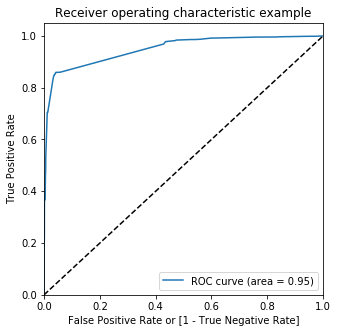

In [176]:
draw_roc(y_train_pred_final.Converted,y_train_pred_final.Converted_prob)

## Step 10:Finding Optimal Cutoff point

In [177]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.188037,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.194070,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.000805,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.782077,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.977003,7987,1,1,1,1,1,1,1,1,1,1,1


In [178]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.705873  0.981603  0.533163
0.2   0.2  0.910408  0.859771  0.942125
0.3   0.3  0.918910  0.859362  0.956210
0.4   0.4  0.920013  0.858136  0.958771
0.5   0.5  0.919383  0.851594  0.961844
0.6   0.6  0.920170  0.851594  0.963124
0.7   0.7  0.919225  0.845053  0.965685
0.8   0.8  0.878287  0.705233  0.986684
0.9   0.9  0.813258  0.524530  0.994110


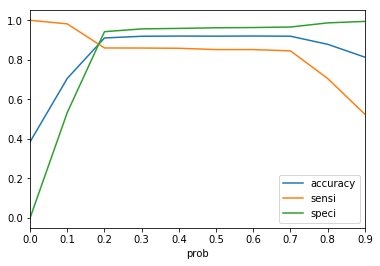

In [181]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


In [182]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.188037,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.194070,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.000805,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.782077,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.977003,7987,1,1,1,1,1,1,1,1,1,1,1,1


### assigning lead score

In [183]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.188037,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.194070,1012,0,1,1,0,0,0,0,0,0,0,0,0,19
2,0,0.000805,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.782077,4750,1,1,1,1,1,1,1,1,1,0,0,1,78
4,1,0.977003,7987,1,1,1,1,1,1,1,1,1,1,1,1,98


In [184]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [185]:
#sensitivity
TP/float(TP+FN)

0.8597710547833197

In [186]:
#specificity
TN/float(TN+FP)

0.9421254801536492

In [187]:
#false positive rate
print(FP/float(TN/FP))

13.88312041315575


In [188]:
#positive predictive value
print(TP/float(TP+FP))

0.9029626449119794


In [189]:
#negative predictive value
print(TN/float(TN+FN))

0.9147190452511188


## Precision and Recall

In [191]:
# looking at confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3756,  149],
       [ 363, 2083]], dtype=int64)

In [192]:
#precision
TP/TP+FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9332437275985663

In [193]:
#recall
TP/TP+FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8515944399018807

In [194]:
### Using sklearn utilities for the same

In [195]:
from sklearn.metrics import precision_score, recall_score

In [196]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.9332437275985663

In [197]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8515944399018807

## Precision and recall tradeoff

In [198]:
from sklearn.metrics import precision_recall_curve

In [199]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
        ..
 6321    0
 6322    1
 6323    0
 6324    1
 6325    0
 6326    0
 6327    0
 6328    1
 6329    1
 6330    1
 6331    0
 6332    0
 6333    0
 6334    0
 6335    0
 6336    0
 6337    0
 6338    0
 6339    0
 6340    0
 6341    0
 6342    1
 6343    0
 6344    1
 6345    1
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      

In [200]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


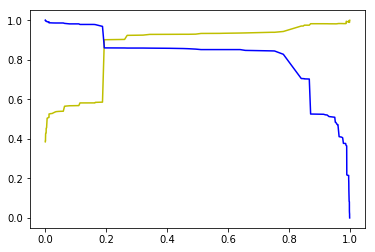

In [204]:
plt.plot(thresholds, p[:-1], "y-")
plt.plot(thresholds, r[:-1], "b-")
plt.show()

### making predictions on the test set

In [205]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Other Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [206]:
X_test=X_test[col2]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
3271,0,0,0,0,0,0,0,0,1,0,1,0,0
1490,0,0,0,1,0,0,0,0,1,0,0,0,0
7936,0,0,0,0,0,0,0,0,1,0,1,0,0
4216,0,1,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,0,0,0,0,0,0,1,0,1,0,0


In [207]:
X_test_sm=sm.add_constant(X_test)

In [208]:
#making predictiond on the test set

y_test_pred=res.predict(X_test_sm)

In [209]:
y_test_pred[:10]

3271    0.188037
1490    0.961508
7936    0.188037
4216    0.999049
3830    0.188037
1800    0.961508
6507    0.012329
4821    0.000445
4223    0.996691
4714    0.188037
dtype: float64

In [210]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [211]:
y_pred_1.head()

,0
3271,0.188037
1490,0.961508
7936,0.188037
4216,0.999049
3830,0.188037


In [212]:
# Converting y_test to dataframe
y_test_df=pd.DataFrame(y_test)

In [213]:
y_test_df['Prospect ID'] = y_test_df.index

In [214]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [215]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [216]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.188037
1,1,1490,0.961508
2,0,7936,0.188037
3,1,4216,0.999049
4,0,3830,0.188037


In [217]:
#renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [218]:
#rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_prob'], axis=1)

In [219]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.188037
1,1490,1,0.961508
2,7936,0,0.188037
3,4216,1,0.999049
4,3830,0,0.188037


In [220]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

In [221]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.188037,0
1,1490,1,0.961508,1
2,7936,0,0.188037,0
3,4216,1,0.999049,1
4,3830,0,0.188037,0


In [222]:
# overall accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.906720528828498

In [223]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1635,   99],
       [ 155,  834]], dtype=int64)

In [224]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [225]:
#sensitivity
TP / float(TP+FN)

0.8432760364004045

In [226]:
#specificity
TN / float(TN+FP)

0.9429065743944637

In [ ]:
# Questions and Answers

##### 1.  Which are the top three variables in your model that contribute most towards the probability of a lead getting converted?

#### Ans:  
The features used to build the model have been represented below based on their importance in lead conversion as per        their coefficient values.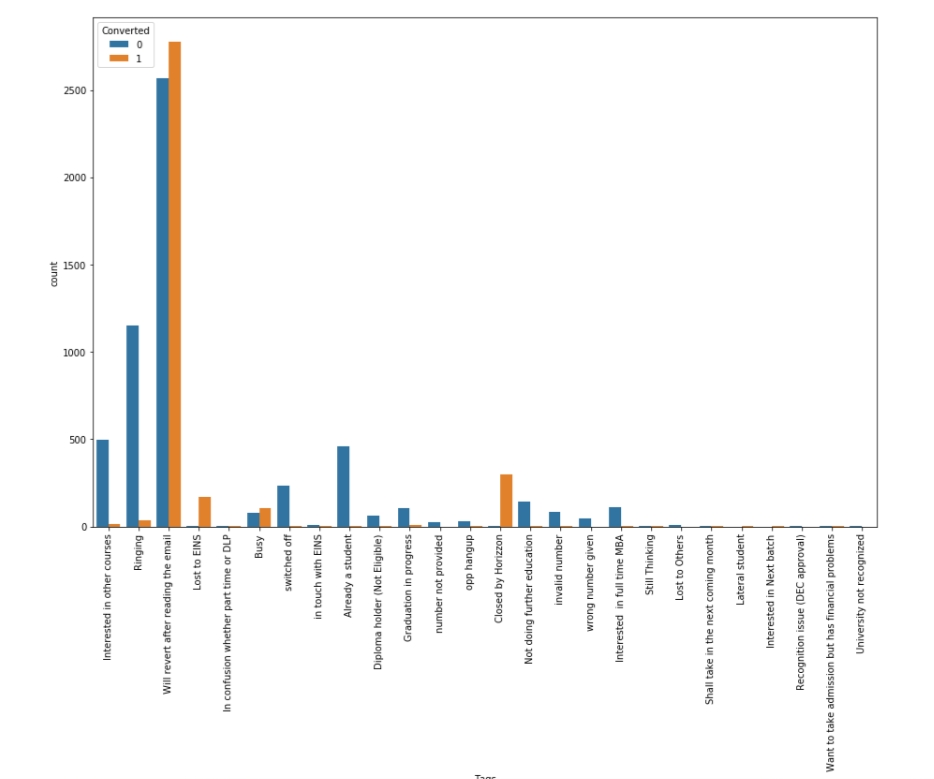As per the above diagram,the top 3 variables that contribute most towards the probability of a lead getting converted are:

1.	Will revert after reading the email
2.	Closed by Horizzon
3.	Lost to EINS




#### 2. 	What are the top 3 categorical/dummy variables in the model which get maximum focus in order to increase the probability of lead conversion?



#### Ans:
As per the above diagram, the top 3 categorical/dummy variables that contribute the most towards the probability of a lead getting converted are also :

1.	Will revert after reading the email
2.	Closed by Horizzon
3.	Lost to EINS


#### 3.	X Education has a period of 2 months every year during which they hire few interns. The sales team, in particular, has around 10 interns allotted to them. So, during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.



#### Ans: 
Sensitivity with respect to our model can be defined as the ratio of total number of actual Conversions correctly predicted to the total no of actual Conversions.

Similarly, Specificity can be defined as the ratio of total no of actual non-Conversions correctly predicted to the total number of actual non-Conversions.

For a particular model, as one increases, the other decreases and vice versa.
Different values of the sensitivity and specificity can be achieved for the same model by changing the Conversion Probability cutoff threshold value.

For our model, the below graph shows how the Sensitivity and Specificity rating changes with change in the threshold value 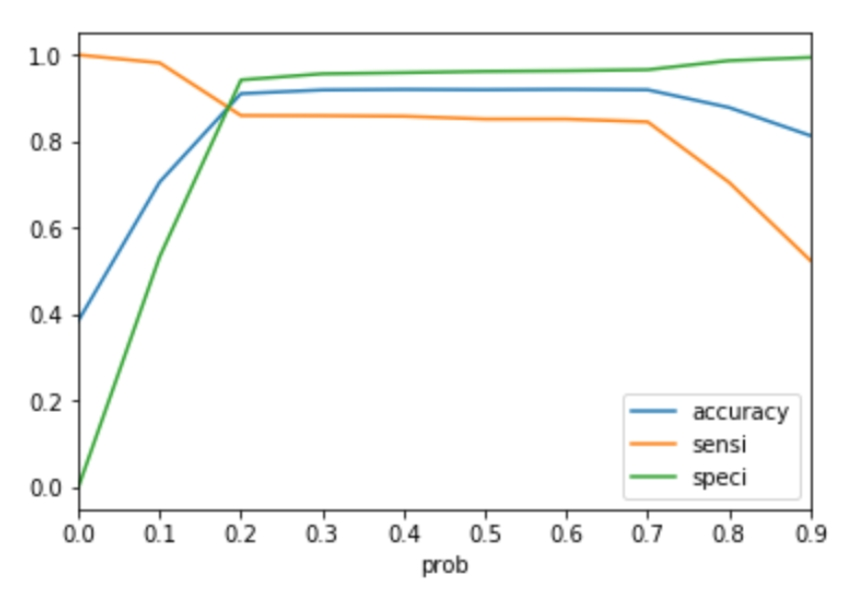

When the probability thresholds are very low, the sensitivity is very high and specificity is very low. Similarly, for larger probability thresholds, the sensitivity values are very low but the specificity values are very high.

High sensitivity implies that our model will correctly identify almost all leads who are likely to Convert. It will do that by over-estimating the Conversion likelihood, i.e. it will misclassify some non-Conversion cases as Conversions. 

Now, since X Education has more man-power for these 2 months and they wish to make the lead conversion more aggressive by wanting almost all of the potential leads, we can choose a lower threshold value for Conversion Probability. 

This will ensure the Sensitivity rating is very high which in turn will make sure almost all leads who are likely to Convert are identified correctly and the agents can make phone calls to as much of such people as possible.




#### 4.	Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.



#### Ans:
Following the similar logic and context from the previous question, High Specificity implies that our model will correctly identify almost all leads who are not likely to Convert. It will do that at the cost of losing out some low Conversion rate risky leads to the competition, i.e. it will misclassify some Conversion cases as non-Conversions.

Therefore, since X Education has already reached its target for a quarter and doesn’t want to make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls, we can choose a higher threshold value for Conversion Probability. 

This will ensure the Specificity rating is very high, which in turn will make sure almost all leads who are on the brink of the probability of getting Converted or not are not selected. As a result the agents won’t have to make unnecessary phone calls and can focus on some new work.


